# White noise and random walk

A random walk can intuitively be viewed as the integral of white noise 

$W(t) = \int_0^t N(t) dt$

Unfortunately life is not so simple. To see why consider the following. For discrete time processes, white noise $N_i$ (time-index $t=i \Delta t$) works wonderfully. Let's start with $N_i$ has a normal distribution with expected value 0 and variance 1, i.e. the margninal probability $f_{N_i}$ for $N_i$ is:

$f_{N_i}(x)= \frac{1}{\sqrt{2 \pi}} e^{-x^2/2}$

with indepenent variables for each discrete time, thus $E N_i N_j = 0$ for $i<>j$. Now consider a discrete random walk as:

$W_i = \sum_{k=1}^{i} N_i$ for $i \ge 0$

Clearly, we have $E W_i=0$ and $E W_i^2=i$

__let's see this in action__

In [7]:
# import some useful packages first
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn #random number generator for normal or gaussian distributed variables.

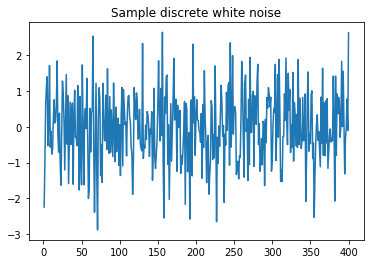

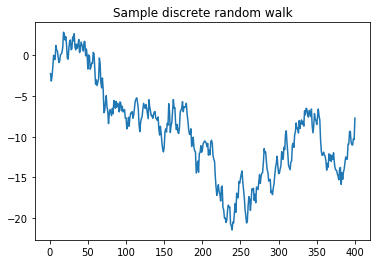

In [33]:
n=400 #length of series
i_all = np.arange(n)+1 #[1,...,n] Note that python is zero base for indexing
N_i = randn(n) 
W_i = np.cumsum(N_i)

# now plot
plt.plot(i_all,N_i)
plt.title("Sample discrete white noise")
plt.show()

plt.plot(i_all,W_i)
plt.title("Sample discrete random walk")
plt.show()
# re-run to see some possible results

Now let's check the statistics, by generating many samples and computing mean and variance.

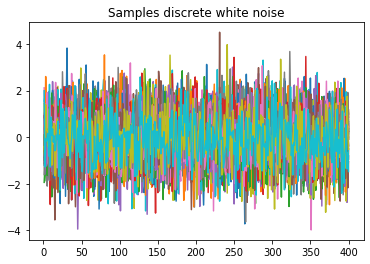

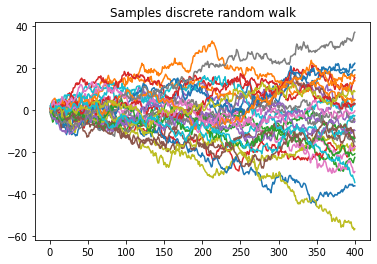

In [34]:
n=400 #length of series 
s=30 # number of samples
i_all = np.arange(n)+1 #[1,...,n] Note that python is zero base for indexing
N_i = randn(n,s) 
W_i = np.cumsum(N_i,axis=0) 

# first plot the series
plt.plot(i_all,N_i)
plt.title("Samples discrete white noise")
plt.show()

plt.plot(i_all,W_i)
plt.title("Samples discrete random walk")
plt.show()
# re-run to see that the sample statistics are reasonable stable for large sample sizes $s$

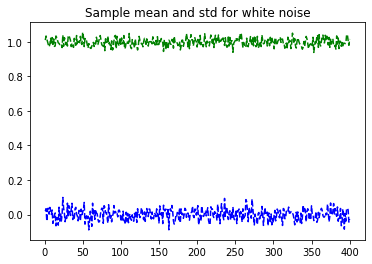

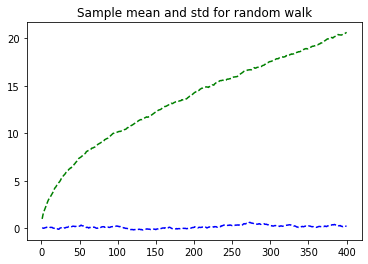

In [38]:
n=400 #length of series 
s=1000 # number of samples
i_all = np.arange(n)+1 #[1,...,n] Note that python is zero base for indexing
N_i = randn(n,s) 
W_i = np.cumsum(N_i,axis=0)

# compute and plot some statistics
mean_N_i = np.mean(N_i,axis=1)
std_N_i  = np.std(N_i,axis=1)

mean_W_i = np.mean(W_i,axis=1)
std_W_i  = np.std(W_i,axis=1)

# first plot the series
plt.plot(i_all,mean_N_i,'b--')
plt.plot(i_all,std_N_i,'g--')
plt.title("Sample mean and std for white noise")
plt.show()

plt.plot(i_all,mean_W_i,'b--')
plt.plot(i_all,std_W_i,'g--')
plt.title("Sample mean and std for random walk")
plt.show()
# re-run and play with sample size s 